In [41]:
# df = dd.read_parquet(
#     "data/censo2024-microdatos/personas",
#     filters=[[("region", "==", 13)]],
# )

In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
import pandas as pd
import geopandas as gpd

In [44]:
import dask.dataframe as dd

In [45]:
def to_int_if_possible(series):
    try:
        return series.astype("Int32")
    except ValueError:
        print(
            f"Conversion to Int32 failed for series '{series.name}'; returning original."
        )
        return series


to_int_if_possible(pd.Series(["1", "2", "3", None, "blah"], name="example_series")).map(
    lambda x: type(x)
)
to_int_if_possible(pd.Series([1, 2, 3, None])).map(lambda x: type(x))

Conversion to Int32 failed for series 'example_series'; returning original.


0    <class 'float'>
1    <class 'float'>
2    <class 'float'>
3    <class 'float'>
dtype: object

In [46]:
def to_int_value(x):
    try:
        return pd.NA if x is None else int(x)
    except:
        return x


to_int_value(None)

<NA>

In [47]:
def load_tabla(filepath) -> pd.DataFrame:
    df = pd.read_csv(
        filepath,
        index_col="Nombre variable",
        thousands=",",
        decimal=".",
    ).drop("Entidad", axis=1)

    df["Valor"] = df["Valor"].map(to_int_value)
    return df


dic_hogares = load_tabla("../data/censo2024-microdatos/tabla_hogares.csv")
dic_hogares

,Descripción de la variable,Valor,Etiqueta de categoría,Rango,Universo,Conteo
Nombre variable,,,,,,
id_vivienda,Llave identificadora de la vivienda o de la en...,1:7664466,Válidos,1:7664466,Todos los registros,6622597
id_hogar,Llave identificadora de hogar,0:26,Válidos,0:26,Todos los registros,6622597
region,Región,1:16,Ver diccionario códigos territoriales,1:16,Todos los hogares,6622597
provincia,Provincia,11:163,Ver diccionario códigos territoriales,11:163,Todos los hogares,6622597
comuna,Comuna,1101:16305,Ver diccionario códigos territoriales,1101:16305,Todos los hogares,6622597
...,...,...,...,...,...,...
tipologia_hogar,Tipología de hogar,6,Compuesto,1:7; NA (no aplica),Todos los hogares,112706
tipologia_hogar,Tipología de hogar,7,Sin núcleo,1:7; NA (no aplica),Todos los hogares,378267
tipologia_hogar,Tipología de hogar,NaN,No aplica,1:7; NA (no aplica),Todos los hogares,26070


In [48]:
dic_viviendas = load_tabla("../data/censo2024-microdatos/tabla_viviendas.csv")
dic_viviendas

,Descripción de la variable,Valor,Etiqueta de categoría,Rango,Universo,Conteo
Nombre variable,,,,,,
id_vivienda,Llave identificadora de la vivienda o de la en...,1:7664466,Válidos,1:7664466,Todos los registros,7664466
region,Región,1:16,Ver diccionario códigos territoriales,1:16,Todos los registros,7664466
provincia,Provincia,11:163,Ver diccionario códigos territoriales,11:163,Todos los registros,7664466
comuna,Comuna,1101:16305,Ver diccionario códigos territoriales,1101:16305,Todos los registros,7664466
area,Área urbana o rural,1,Urbano,1:2,Todos los registros,6366114
...,...,...,...,...,...,...
indice_hacinamiento,Índice de hacinamiento,3,Vivienda con hacinamiento crítico,1:3;\n-99 (no respuesta); \nNA (no aplica),Todas las viviendas particulares ocupadas con ...,36231
indice_hacinamiento,Índice de hacinamiento,-99,No respuesta,1:3;\n-99 (no respuesta); \nNA (no aplica),Todas las viviendas particulares ocupadas con ...,1034
indice_hacinamiento,Índice de hacinamiento,NaN,No aplica,1:3;\n-99 (no respuesta); \nNA (no aplica),Todas las viviendas particulares ocupadas con ...,1256294


In [49]:
chile_comunas = gpd.read_file("../data/processed/chile_comunas.geojson")
valparaiso = gpd.read_file("../data/processed/region_valparaiso.geojson")
gran_santiago = gpd.read_file("../data/processed/region_metropolitana.geojson")
biobio = gpd.read_file("../data/processed/region_biobio.geojson")

In [50]:
def read_parquet(filepath, filters=None):
    df = pd.read_parquet(filepath, filters=filters)
    for col in df.select_dtypes(include="number").columns:
        df[col] = to_int_if_possible(df[col])
    return df


hogares = read_parquet(
    "../data/raw/hogares_censo2024.parquet",
    filters=[[("region", "==", 8)]],
)
hogares

,id_vivienda,id_hogar,region,provincia,comuna,comuna_bajo_umbral,area,tipo_operativo,p12_tenencia_viv,p13_comb_cocina,p14_comb_calefaccion,p15a_serv_tel_movil,p15b_serv_compu,p15c_serv_tablet,p15d_serv_internet_fija,p15e_serv_internet_movil,p15f_serv_internet_satelital,tipologia_hogar
0,5,1,8,83,8301,2,1,2,1,1,2,1,2,1,1,1,2,1
1,7,1,8,81,8111,2,2,2,6,1,1,1,1,2,2,1,2,4
2,45,1,8,83,8304,2,2,2,1,3,3,1,2,2,2,2,2,3
3,64,1,8,81,8101,2,1,2,2,1,6,1,1,2,1,1,2,4
4,73,1,8,81,8108,2,1,2,1,1,3,1,1,1,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580655,7664389,1,8,83,8301,2,1,2,1,1,8,1,1,2,2,1,2,1
580656,7664398,1,8,81,8112,2,1,2,1,1,4,1,2,2,1,1,2,5
580657,7664433,1,8,82,8203,2,1,2,1,1,3,1,1,1,1,1,2,1
580658,7664442,1,8,82,8202,2,1,2,1,3,3,1,2,2,1,2,2,4


In [51]:
def get_mapping_variable(variable: str, dic: pd.DataFrame) -> dict:
    if variable not in dic.index:
        raise ValueError(f"Variable '{variable}' not found in dictionary.")

    mapping = (
        dic.loc[variable]
        .reset_index(drop=True)
        .set_index("Valor")["Etiqueta de categoría"]
        .to_dict()
    )

    return mapping


mapped_calef = get_mapping_variable("p14_comb_calefaccion", dic_hogares)
mapped_calef

{1: 'Gas',
 2: 'Parafina o petróleo',
 3: 'Leña',
 4: 'Pellet',
 5: 'Carbón',
 6: 'Electricidad',
 7: 'Otra',
 8: 'No utiliza fuente de energía o combustible para calefaccionar',
 -99: 'No respuesta',
 nan: 'No aplica'}

In [52]:
calefaccion = (
    hogares.groupby("comuna")["p14_comb_calefaccion"].value_counts().unstack().fillna(0)
)
calefaccion.columns = calefaccion.columns.map(mapped_calef)
calefaccion.columns.name = "Combustible de calefacción"
calefaccion

Combustible de calefacción,No respuesta,Gas,Parafina o petróleo,Leña,Pellet,Carbón,Electricidad,Otra,No utiliza fuente de energía o combustible para calefaccionar
comuna,,,,,,,,,
8101,6,17432,10762,22512,4244,108,28678,289,7687
8102,0,5442,2406,25377,2398,44,4045,81,2092
8103,2,5970,3265,12084,1963,30,4570,89,1397
8104,0,290,127,4101,65,26,206,3,134
8105,1,881,388,6595,196,18,458,14,264
8106,1,1544,608,9652,399,56,865,27,653
8107,1,3562,1668,7635,453,34,2134,29,1313
8108,0,10375,5148,19032,3668,41,10289,99,3622
8109,0,295,106,4798,82,11,190,4,116


In [53]:
calefaccion_percent = calefaccion.div(calefaccion.sum(axis=1), axis=0)
calefaccion_percent

Combustible de calefacción,No respuesta,Gas,Parafina o petróleo,Leña,Pellet,Carbón,Electricidad,Otra,No utiliza fuente de energía o combustible para calefaccionar
comuna,,,,,,,,,
8101,0.000065,0.190061,0.117338,0.245448,0.046272,0.001178,0.312676,0.003151,0.083811
8102,0.0,0.129927,0.057443,0.605873,0.057252,0.00105,0.096574,0.001934,0.049946
8103,0.000068,0.203269,0.111168,0.41144,0.066837,0.001021,0.155601,0.00303,0.047566
8104,0.0,0.058562,0.025646,0.82815,0.013126,0.00525,0.041599,0.000606,0.02706
8105,0.000113,0.099943,0.044016,0.748157,0.022235,0.002042,0.051957,0.001588,0.029949
8106,0.000072,0.111844,0.044042,0.699167,0.028903,0.004057,0.062658,0.001956,0.047302
8107,0.000059,0.211658,0.099115,0.453681,0.026918,0.00202,0.126805,0.001723,0.07802
8108,0.0,0.198473,0.098481,0.364082,0.070169,0.000784,0.196828,0.001894,0.069289
8109,0.0,0.05266,0.018922,0.85648,0.014638,0.001964,0.033916,0.000714,0.020707


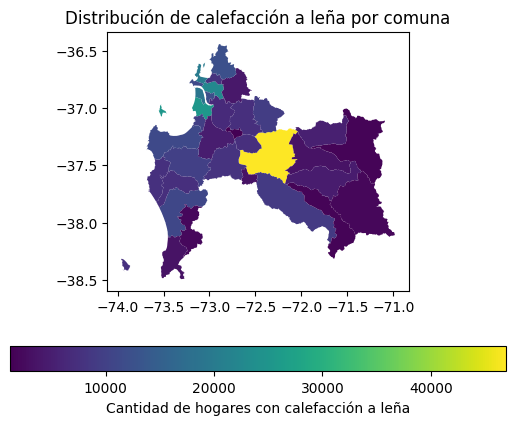

In [54]:
calefaccion_test = chile_comunas.set_index("COD_COM").join(calefaccion)

ax = calefaccion_test.plot(
    column="Leña",
    legend=True,
    legend_kwds={
        "label": "Cantidad de hogares con calefacción a leña",
        "orientation": "horizontal",
    },
)
ax.set_title("Distribución de calefacción a leña por comuna")
plt.show()

In [55]:
def to_lines(text, max_words_per_line=5):
    words = text.split()
    lines = []
    for i in range(0, len(words), max_words_per_line):
        lines.append(" ".join(words[i : i + max_words_per_line]))
    return "\n".join(lines)

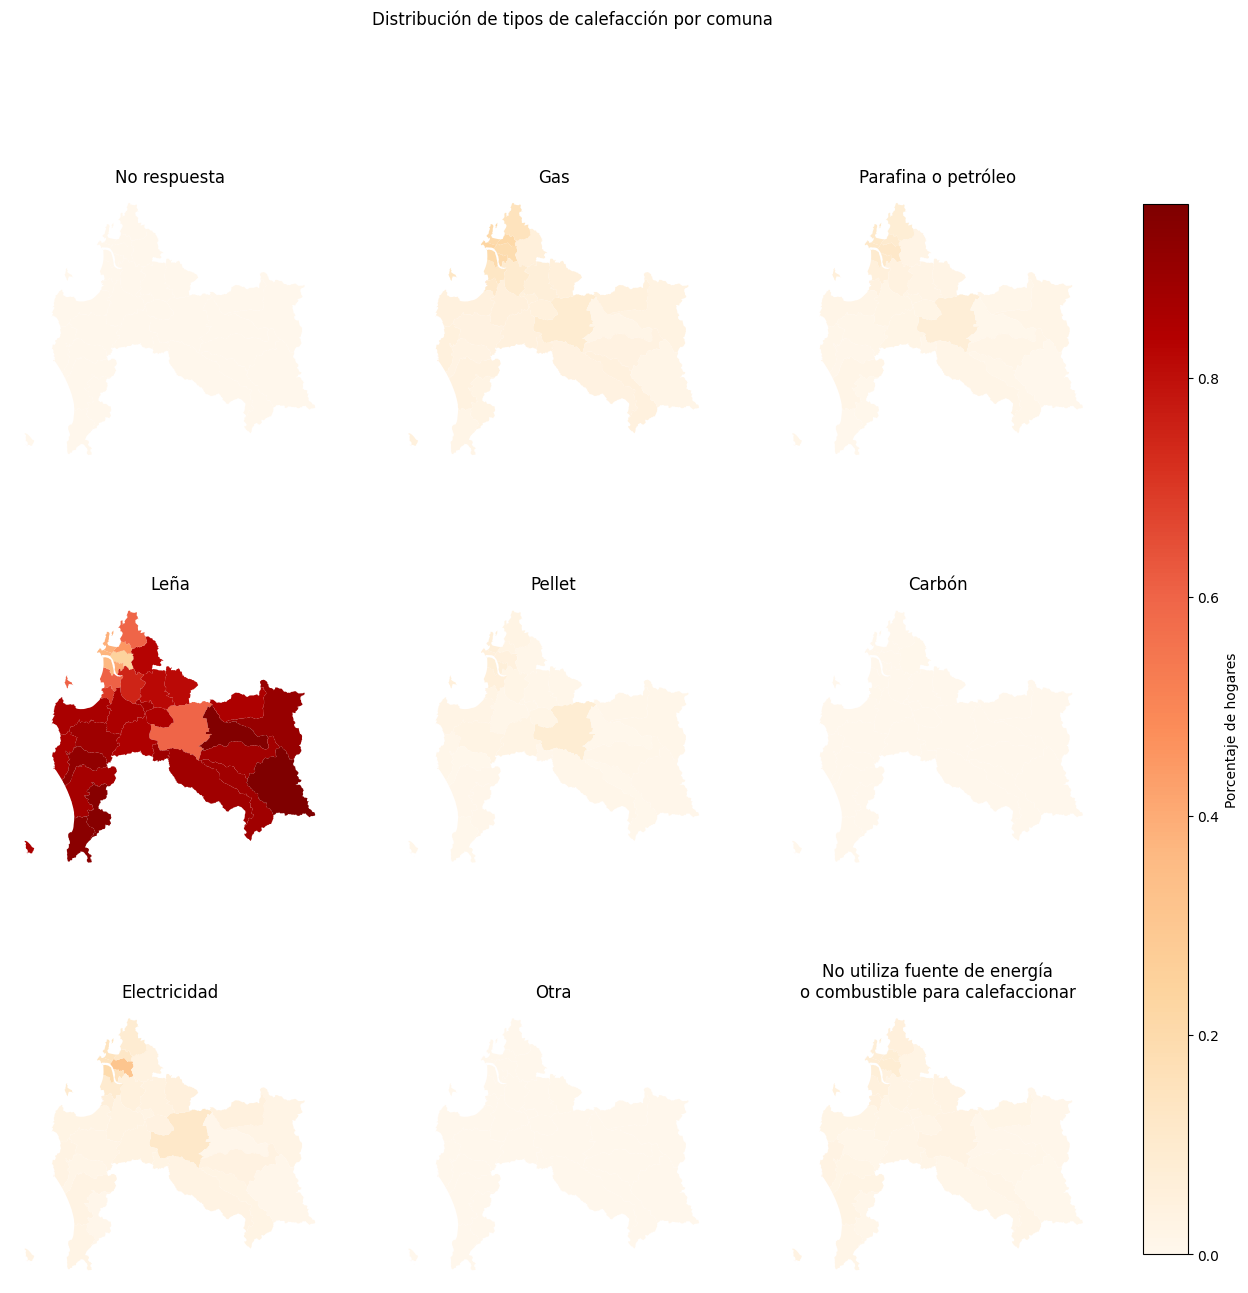

In [56]:
def plot_calefaccion(calefaccion, gdf):
    # Selecciona las columnas a graficar (puedes ajustar esta lista)
    columns = calefaccion.columns.tolist()

    cmap = "OrRd"

    ncols = 3  # Número de columnas de subplots
    nrows = int(np.ceil(len(columns) / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()

    calefaccion_percent_gdf = gdf.set_index("COD_COM").join(calefaccion)
    vmin = calefaccion_percent_gdf[columns].min().min()
    vmax = calefaccion_percent_gdf[columns].max().max()

    for i, col in enumerate(columns):
        ax = axes[i]
        calefaccion_percent_gdf.plot(
            column=col, ax=ax, legend=False, vmin=vmin, vmax=vmax, cmap=cmap
        )
        title = to_lines(col, max_words_per_line=5)
        ax.set_title(title)
        ax.axis("off")

    # Elimina ejes vacíos si hay menos mapas que subplots
    total_plots = nrows * ncols
    for j in range(len(columns), total_plots):
        fig.delaxes(axes[j])

    # Agrega una sola barra de color (leyenda) grande
    fig.subplots_adjust(right=0.85)
    cax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label("Porcentaje de hogares")

    plt.suptitle("Distribución de tipos de calefacción por comuna")
    plt.show()


plot_calefaccion(calefaccion_percent, biobio)

In [57]:
# plot_calefaccion(calefaccion_percent, valparaiso)

In [58]:
# plot_calefaccion(calefaccion_percent, biobio)

In [59]:
viviendas = read_parquet(
    "../data/raw/viviendas_censo2024.parquet", filters=[[("region", "==", 8)]]
)
viviendas

,id_vivienda,region,provincia,comuna,comuna_bajo_umbral,area,tipo_operativo,cant_hog,cant_per,p2_tipo_vivienda,...,p5_num_dormitorios,p6_fuente_agua,p7_distrib_agua,p8_serv_hig,p9_fuente_elect,p10_basura,p11a_num_personas,p11b_comparte_gasto,p11c_num_hogar,indice_hacinamiento
0,5,8,83,8301,2,1,2,1,1,1,...,1,1,1,1,1,1,1,<NA>,<NA>,1
1,7,8,81,8111,2,2,2,1,6,1,...,2,2,1,3,1,1,6,1,<NA>,2
2,45,8,83,8304,2,2,2,1,2,1,...,1,1,1,3,1,1,2,1,<NA>,1
3,53,8,81,8108,2,1,2,0,0,3,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,64,8,81,8101,2,1,2,1,3,3,...,3,1,1,1,1,1,3,1,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661950,7664389,8,83,8301,2,1,2,1,1,1,...,1,1,1,1,1,1,1,<NA>,<NA>,1
661951,7664398,8,81,8112,2,1,2,1,5,1,...,3,1,1,1,1,1,5,1,<NA>,1
661952,7664433,8,82,8203,2,1,2,1,1,1,...,1,1,1,1,1,1,1,<NA>,<NA>,1
661953,7664442,8,82,8202,2,1,2,1,5,1,...,4,1,1,1,1,1,5,1,<NA>,1


In [ ]:
# Coded by @Facondi
def crear_indice_materialidad(df):
    """Crea un índice de materialidad basado en paredes, techo y piso. Escala: 1 (Buena) a 3 (Deficiente)"""
    df = df.copy()

    df["mat_paredes_score"] = (
        df["p4a_mat_paredes"]
        .map({1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, -99: 2})
        .fillna(2)
    )

    df["mat_techo_score"] = (
        df["p4b_mat_techo"]
        .map({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, -99: 2})
        .fillna(2)
    )

    df["mat_piso_score"] = (
        df["p4c_mat_piso"].map({1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, -99: 2}).fillna(2)
    )

    df["indice_materialidad"] = (
        df["mat_paredes_score"] * 0.40
        + df["mat_techo_score"] * 0.35
        + df["mat_piso_score"] * 0.25
    )

    df["categoria_materialidad"] = pd.cut(
        df["indice_materialidad"],
        bins=[0, 1.5, 2.25, 3],
        labels=["Buena", "Regular", "Deficiente"],
    )
    return df


viviendas = crear_indice_materialidad(viviendas)
print(viviendas["categoria_materialidad"].value_counts())

categoria_materialidad
Regular       349451
Buena         312107
Deficiente       397
Name: count, dtype: int64


In [61]:
tipo_vivienda = get_mapping_variable("p2_tipo_vivienda", dic_viviendas)
tipo_vivienda

{1: 'Casa',
 3: 'Departamento',
 5: 'Vivienda tradicional indígena (ruka u otras)',
 6: 'Pieza en casa antigua o en conventillo',
 7: 'Mediagua, mejora, vivienda de emergencia, rancho o choza',
 8: 'Móvil (carpa, casa rodante o similar)',
 9: 'Otro tipo de vivienda particular',
 nan: 'No aplica'}

In [65]:
columns_to_merge = [
    "region",
    "provincia",
    "comuna",
    "id_vivienda",
    "p2_tipo_vivienda",
    "categoria_materialidad",
]
viviendas[columns_to_merge]

,region,provincia,comuna,id_vivienda,p2_tipo_vivienda,categoria_materialidad
0,8,83,8301,5,1,Buena
1,8,81,8111,7,1,Regular
2,8,83,8304,45,1,Regular
3,8,81,8108,53,3,Regular
4,8,81,8101,64,3,Buena
...,...,...,...,...,...,...
661950,8,83,8301,7664389,1,Buena
661951,8,81,8112,7664398,1,Buena
661952,8,82,8203,7664433,1,Regular
661953,8,82,8202,7664442,1,Regular


In [66]:
hogares = hogares.merge(viviendas[columns_to_merge], how="left", validate="many_to_one")
hogares

,id_vivienda,id_hogar,region,provincia,comuna,comuna_bajo_umbral,area,tipo_operativo,p12_tenencia_viv,p13_comb_cocina,p14_comb_calefaccion,p15a_serv_tel_movil,p15b_serv_compu,p15c_serv_tablet,p15d_serv_internet_fija,p15e_serv_internet_movil,p15f_serv_internet_satelital,tipologia_hogar,p2_tipo_vivienda,categoria_materialidad
0,5,1,8,83,8301,2,1,2,1,1,2,1,2,1,1,1,2,1,1,Buena
1,7,1,8,81,8111,2,2,2,6,1,1,1,1,2,2,1,2,4,1,Regular
2,45,1,8,83,8304,2,2,2,1,3,3,1,2,2,2,2,2,3,1,Regular
3,64,1,8,81,8101,2,1,2,2,1,6,1,1,2,1,1,2,4,3,Buena
4,73,1,8,81,8108,2,1,2,1,1,3,1,1,1,1,1,2,4,1,Buena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580655,7664389,1,8,83,8301,2,1,2,1,1,8,1,1,2,2,1,2,1,1,Buena
580656,7664398,1,8,81,8112,2,1,2,1,1,4,1,2,2,1,1,2,5,1,Buena
580657,7664433,1,8,82,8203,2,1,2,1,1,3,1,1,1,1,1,2,1,1,Regular
580658,7664442,1,8,82,8202,2,1,2,1,3,3,1,2,2,1,2,2,4,1,Regular


In [72]:
calefaccion_calidad = (
    hogares.groupby(["comuna", "categoria_materialidad", "p14_comb_calefaccion"])
    .size()
    .unstack()
)
calefaccion_calidad.columns = calefaccion_calidad.columns.map(mapped_calef)
# calefaccion.columns.name = "Combustible de calefacción"
calefaccion_calidad

/var/folders/73/mp1vchxj68b8gzsk0npql1w00000gn/T/ipykernel_38296/1087597375.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hogares.groupby(["comuna","categoria_materialidad", "p14_comb_calefaccion"]).size().unstack()


p14_comb_calefaccion           No respuesta    Gas  Parafina o petróleo  \
comuna categoria_materialidad                                             
8101   Buena                              3  13846                 8367   
       Regular                            3   3584                 2387   
       Deficiente                         0      2                    8   
8102   Buena                              0   3603                 1690   
       Regular                            0   1838                  715   
...                                     ...    ...                  ...   
8313   Regular                            0    367                  121   
       Deficiente                         0      0                    1   
8314   Buena                              0     13                    1   
       Regular                            0     21                    3   
       Deficiente                         0      0                    0   

p14_comb_calefaccion            Leña  Pellet  Carbón  Electricidad  Otra  \
comuna categoria_materialidad                                              
8101   Buena                   14194    3748      28         26318   260   
       Regular                  8304     495      78          2355    29   
       Deficiente                 14       1       2             5     0   
8102   Buena                   15669    1832      21          2688    51   
       Regular                  9691     566      23          1354    29   
...                              ...     ...     ...           ...   ...   
8313   Regular                  4774      52      15           216     7   
       Deficiente                 14       0       0             0     0   
8314   Buena                     168       2       0             1     0   
       Regular                  1755      15       0            16     2   
       Deficiente                 22       0       0             0     1   

p14_comb_calefaccion           No utiliza fuente de energía o combustible para calefaccionar  
comuna categoria_materialidad                                                                 
8101   Buena                                                                5968              
       Regular                                                              1702              
       Deficiente                                                             17              
8102   Buena                                                                1143              
       Regular                                                               936              
...                                                                          ...              
8313   Regular                                                               198              
       Deficiente                                                              0              
8314   Buena                                                                   0              
       Regular                                                                 9              
       Deficiente                                                              0              

[99 rows x 9 columns]

In [101]:
calefaccion_calidad.groupby(level="comuna").sum().sum(axis=1)

comuna
8101    91718
8102    41885
8103    29370
8104     4952
8105     8815
8106    13805
8107    16829
8108    52274
8109     5602
8110    50931
8111    20717
8112    30590
8201     8777
8202    13185
8203    12530
8204     2288
8205    11095
8206     7985
8207     3607
8301    78445
8302     1722
8303    11389
8304     8562
8305    10163
8306     9231
8307     3762
8308     1727
8309     3582
8310     1322
8311     5215
8312     6176
8313     8890
8314     2029
dtype: int64

In [ ]:
calefaccion_calidad_percent = calefaccion_calidad.div(
    # calefaccion_calidad.sum(axis=1),
    calefaccion_calidad.groupby(level="comuna")
    .sum()
    .sum(axis=1),  # normaliza por comuna
    axis=0,
)
calefaccion_calidad_percent

p14_comb_calefaccion           No respuesta       Gas  Parafina o petróleo  \
comuna categoria_materialidad                                                
8101   Buena                       0.000033  0.150963             0.091225   
       Regular                     0.000033  0.039076             0.026025   
       Deficiente                  0.000000  0.000022             0.000087   
8102   Buena                       0.000000  0.086021             0.040349   
       Regular                     0.000000  0.043882             0.017071   
...                                     ...       ...                  ...   
8313   Regular                     0.000000  0.041282             0.013611   
       Deficiente                  0.000000  0.000000             0.000112   
8314   Buena                       0.000000  0.006407             0.000493   
       Regular                     0.000000  0.010350             0.001479   
       Deficiente                  0.000000  0.000000             0.000000   

p14_comb_calefaccion               Leña    Pellet    Carbón  Electricidad  \
comuna categoria_materialidad                                               
8101   Buena                   0.154757  0.040864  0.000305      0.286945   
       Regular                 0.090538  0.005397  0.000850      0.025677   
       Deficiente              0.000153  0.000011  0.000022      0.000055   
8102   Buena                   0.374096  0.043739  0.000501      0.064176   
       Regular                 0.231372  0.013513  0.000549      0.032327   
...                                 ...       ...       ...           ...   
8313   Regular                 0.537008  0.005849  0.001687      0.024297   
       Deficiente              0.001575  0.000000  0.000000      0.000000   
8314   Buena                   0.082799  0.000986  0.000000      0.000493   
       Regular                 0.864958  0.007393  0.000000      0.007886   
       Deficiente              0.010843  0.000000  0.000000      0.000000   

p14_comb_calefaccion               Otra  \
comuna categoria_materialidad             
8101   Buena                   0.002835   
       Regular                 0.000316   
       Deficiente              0.000000   
8102   Buena                   0.001218   
       Regular                 0.000692   
...                                 ...   
8313   Regular                 0.000787   
       Deficiente              0.000000   
8314   Buena                   0.000000   
       Regular                 0.000986   
       Deficiente              0.000493   

p14_comb_calefaccion           No utiliza fuente de energía o combustible para calefaccionar  
comuna categoria_materialidad                                                                 
8101   Buena                                                            0.065069              
       Regular                                                          0.018557              
       Deficiente                                                       0.000185              
8102   Buena                                                            0.027289              
       Regular                                                          0.022347              
...                                                                          ...              
8313   Regular                                                          0.022272              
       Deficiente                                                       0.000000              
8314   Buena                                                            0.000000              
       Regular                                                          0.004436              
       Deficiente                                                       0.000000              

[99 rows x 9 columns]

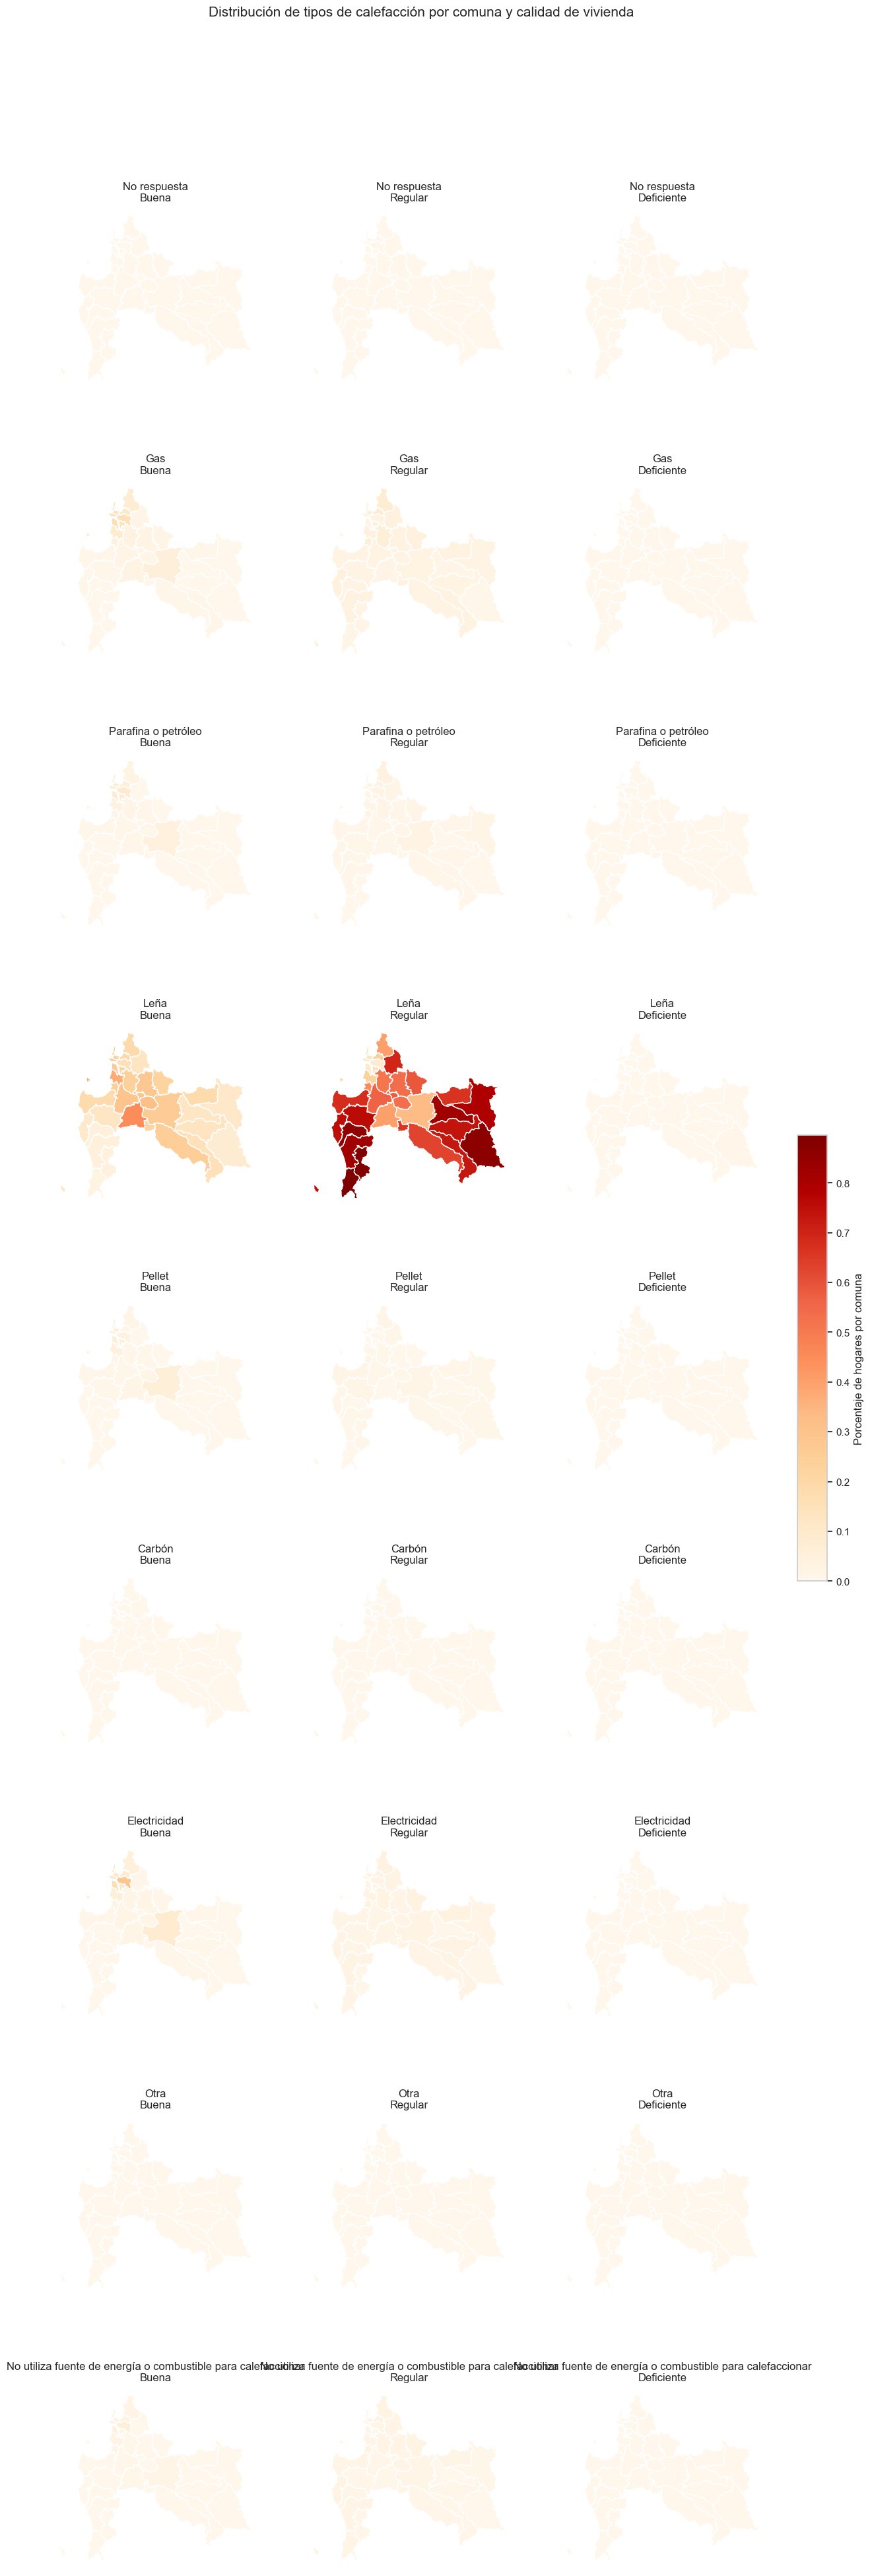

In [ ]:
def plot_calefaccion_calidad(calefaccion, gdf, cmap="OrRd"):
    materialidad_cats = calefaccion.index.get_level_values(
        "categoria_materialidad"
    ).unique()
    calefaccion_types = calefaccion.columns.tolist()

    ncols = len(materialidad_cats)
    nrows = len(calefaccion_types)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))

    vmin = calefaccion.min().min()
    vmax = calefaccion.max().max()

    for col_idx, mat_cat in enumerate(materialidad_cats):
        for row_idx, calef_type in enumerate(calefaccion_types):
            ax = axes[row_idx, col_idx]
            # Filter for materialidad category
            df = calefaccion.xs(mat_cat, level="categoria_materialidad")
            # Join with geo
            map_df = gdf.set_index("COD_COM").join(df[calef_type])
            map_df.plot(
                column=calef_type,
                ax=ax,
                legend=False,
                cmap=cmap,
                vmin=vmin,
                vmax=vmax,
            )
            ax.set_title(f"{calef_type}\n{mat_cat}")
            ax.axis("off")

    # Agrega una sola barra de color (leyenda) más corta y a la derecha
    fig.subplots_adjust(right=0.85, top=0.92)  # Deja espacio arriba para el título
    cax = fig.add_axes([0.88, 0.45, 0.03, 0.15])  # Más corta y centrada verticalmente
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label("Porcentaje de hogares por comuna")
    fig.suptitle(
        "Distribución de tipos de calefacción por comuna y calidad de vivienda",
        fontsize=15,
    )  # Ajusta la posición del título arriba
    # plt.tight_layout(rect=[0, 0, 0.85, 0.92])  # Deja espacio a la derecha y arriba
    plt.show()


plot_calefaccion_calidad(calefaccion_calidad_percent, biobio)